# WeatherPy - Miriam Berkowitz

## Analysis
### 1) Temperatures are higher closer to the equator.
### 2) Cloudiness is pretty evenly spread across latitudes.
### 3) Wind is calmer closer to the equator.

In [1]:
# 1) Get random coordinates and find the closest city from citypy 
# 2) Use the weather API to get the weather data; ensure no duplicates
# 3) Store the weather data in lists 
# 4) Store the lists in a Data Frame and save in a CSV file
# 5) Plot 4 scatter plots using the Data Frame and save the images

In [2]:
# Dependencies
from citipy import citipy
import pandas as pd
from random import uniform
import csv
import matplotlib.pyplot as plt
import requests as req
import seaborn as sns
sns.set(color_codes=True)
from datetime import datetime 


In [3]:
# Save config information.
api_key = "c1a253080c68be852f657f9e08b1bd39"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + '&q='

In [4]:
#initialize variables and lists

cities_needed = 500 
cities_with_data = 0
duplicates = []
cities_without_data = []

lat_data=[]
temp_data=[]
humidity_data=[]
wind_data=[]
city_name=[]
city_id=[]
cloud_data=[]
country_code_data=[]

In [5]:
#1) Get cities for random coordinates from citypy 
while (cities_with_data < cities_needed):
           
       
    #get random coordinates; restrict range to get land vs water
    lat = uniform(-45,85)
    long = uniform(-140, 150)
    
    #get the city closest to the coordinate
    city_p=citipy.nearest_city(lat,long)    
    
    #store the nearest city in lower case
    city = str.lower(city_p.city_name)
    country = city_p.country_code
      
    
    #2) ensure the city is not a duplicate of: a)existing list b) cities without weather data or c) duplicates
    if (city not in city_name) and (city not in cities_without_data) and (city not in duplicates):
                   
        #2) get weather data for the city and print log
        total_url = query_url + "city=" +  city + "," + country
        print("city: " + city + ", " + country + ", URL: " + total_url)
        response = req.get(total_url).json()     
                
              
        #3) read and store response data if it exists, and handle missing data
        try:

            # Extract required data from responses and add to data lists
            retrieved_city = str.lower(response.get("name"))
            #print("got data for " + retrieved_city)

            #need to check again for duplicate city because sometimes city returned in response is not
            # exactly the same as the city input into the URL
            if (retrieved_city not in city_name) and (retrieved_city not in duplicates):

                lat_data.append(response.get("coord").get("lat"))
                temp_data.append(response.get("main").get("temp"))
                humidity_data.append(response.get("main").get("humidity"))
                wind_data.append(response.get("wind").get("speed"))
                city_name.append(retrieved_city)
                city_id.append(response.get("id"))
                cloud_data.append(response.get("clouds").get("all"))
                country_code_data.append(response.get("sys").get("country"))
                #date = response.get("dt")
                cities_with_data = cities_with_data + 1
                
            else:
                print("Duplicate in response for: " + retrieved_city)
                duplicates.append(city)
        except:
            print("no data for %s" % city)
            cities_without_data.append(city)
            continue
   
    else:
        print("duplicate: " + city)
        duplicates.append(city)
    #end if    
   
    
#end while loop to get all the cities 


print("cities with data: %s" % str(cities_with_data))
print("cities without data: %s" % len(cities_without_data))
print("dupicates: %s" % len(duplicates))
    

city: attawapiskat, ca, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=attawapiskat,ca
city: bakchar, ru, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=bakchar,ru
city: hambantota, lk, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=hambantota,lk
city: banda aceh, id, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=banda aceh,id
city: jacqueville, ci, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=jacqueville,ci
no data for jacqueville
city: san jose, gt, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=san jose,gt
city: illoqqortoormiut, gl, URL: http://api.openweathermap.org/data/2.5/weather?appid=

duplicate: jamestown
city: siocon, ph, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=siocon,ph
city: bonthe, sl, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=bonthe,sl
Duplicate in response for: mogbwemo
duplicate: cape town
city: kavaratti, in, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=kavaratti,in
no data for kavaratti
city: methoni, gr, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=methoni,gr
city: sisimiut, gl, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=sisimiut,gl
no data for sisimiut
city: inverness, ca, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=inverness,ca
duplicate: riki

duplicate: jamestown
city: kasongo, cd, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=kasongo,cd
city: prince rupert, ca, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=prince rupert,ca
city: tromso, no, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=tromso,no
Duplicate in response for: tromsø
city: teya, ru, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=teya,ru
no data for teya
city: sorong, id, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=sorong,id
duplicate: hithadhoo
city: tuktoyaktuk, ca, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=tuktoyaktuk,ca
city: vila do maio, cv, URL: http://api

city: cockburn town, bs, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=cockburn town,bs
duplicate: atuona
city: saldanha, za, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=saldanha,za
duplicate: illoqqortoormiut
city: helong, cn, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=helong,cn
no data for helong
city: jinchengjiang, cn, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=jinchengjiang,cn
no data for jinchengjiang
city: bambous virieux, mu, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=bambous virieux,mu
city: muros, es, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=muros,es
city: vila fran

city: taolanaro, mg, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=taolanaro,mg
Duplicate in response for: amparihy
duplicate: rikitea
city: fukue, jp, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=fukue,jp
no data for fukue
city: osmena, ph, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=osmena,ph
city: rokytne, ua, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=rokytne,ua
city: port blair, in, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=port blair,in
city: tual, id, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=tual,id
city: qasigiannguit, gl, URL: http://api.openweathermap.org/data/2.5/we

duplicate: puerto ayora
city: pacific grove, us, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=pacific grove,us
city: flin flon, ca, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=flin flon,ca
city: riaba, gq, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=riaba,gq
duplicate: batagay
duplicate: hithadhoo
city: gazanjyk, tm, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=gazanjyk,tm
no data for gazanjyk
city: bardsir, ir, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=bardsir,ir
no data for bardsir
duplicate: rikitea
duplicate: yellowknife
city: kingsburg, us, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperi

city: samarai, pg, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=samarai,pg
city: baracoa, cu, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=baracoa,cu
city: henties bay, na, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=henties bay,na
city: katherine, au, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=katherine,au
city: cootamundra, au, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=cootamundra,au
city: pemagatsel, bt, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=pemagatsel,bt
no data for pemagatsel
city: narsaq, gl, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852

city: pangkalanbuun, id, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=pangkalanbuun,id
city: north bend, us, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=north bend,us
Duplicate in response for: charlestown
city: castro, cl, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=castro,cl
duplicate: saskylakh
duplicate: ponta do sol
city: tvoroyri, fo, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=tvoroyri,fo
city: baiyin, cn, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=baiyin,cn
no data for baiyin
duplicate: bathsheba
duplicate: puerto ayora
duplicate: georgetown
city: boynton beach, us, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be85

duplicate: kamenka
city: kamaishi, jp, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=kamaishi,jp
no data for kamaishi
city: korla, cn, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=korla,cn
duplicate: broome
city: greece, us, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=greece,us
duplicate: hithadhoo
city: greenville, us, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=greenville,us
duplicate: tiksi
city: shizunai, jp, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=shizunai,jp
no data for shizunai
duplicate: rikitea
duplicate: carutapera
duplicate: qaanaaq
city: ganzhou, cn, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b

city: kupang, id, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=kupang,id
city: lerwick, gb, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=lerwick,gb
duplicate: codrington
city: amderma, ru, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=amderma,ru
Duplicate in response for: rudnik
duplicate: los llanos de aridane
city: serra, br, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=serra,br
duplicate: illoqqortoormiut
city: bouna, ci, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=bouna,ci
no data for bouna
duplicate: caravelas
duplicate: half moon bay
city: faya, td, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=i

city: adrar, dz, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=adrar,dz
city: soskovo, ru, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=soskovo,ru
duplicate: ancud
duplicate: dikson
duplicate: jamestown
duplicate: illoqqortoormiut
city: legnago, it, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=legnago,it
duplicate: cayenne
duplicate: talnakh
city: soure, br, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=soure,br
city: aquiraz, br, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=aquiraz,br
duplicate: puerto ayora
duplicate: ancud
duplicate: jamestown
duplicate: rikitea
duplicate: meulaboh
city: vilcun, cl, URL: http://api.openweathermap.org/data/2.5/weather?

duplicate: labutta
city: esperance, au, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=esperance,au
duplicate: esperance
duplicate: bengkulu
city: bosaso, so, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=bosaso,so
duplicate: georgetown
duplicate: rikitea
duplicate: port alfred
duplicate: puerto ayora
duplicate: sao filipe
city: praia, cv, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=praia,cv
duplicate: klaksvik
duplicate: yellowknife
duplicate: caravelas
city: narsaq, gl, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=narsaq,gl
Duplicate in response for: garden city
city: bubaque, gw, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=bubaque,gw
duplicate: sao f

city: tanabe, jp, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=tanabe,jp
no data for tanabe
duplicate: rikitea
duplicate: san cristobal
duplicate: chimbarongo
city: zonguldak, tr, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=zonguldak,tr
duplicate: vila franca do campo
duplicate: murmashi
duplicate: arraial do cabo
city: hualmay, pe, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=hualmay,pe
Duplicate in response for: huacho
duplicate: coquimbo
city: hermon, us, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=hermon,us
city: mayskiy, ru, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=mayskiy,ru
duplicate: thompson
duplicate: bintulu
duplicate: arraial do cabo


no data for hovd
city: ayagoz, kz, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=ayagoz,kz
city: toamasina, mg, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=toamasina,mg
duplicate: sao filipe
duplicate: laguna
duplicate: torbay
city: waynesville, us, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=waynesville,us
city: vryburg, za, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=vryburg,za
duplicate: lagoa
city: marcona, pe, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=marcona,pe
city: celestun, mx, URL: http://api.openweathermap.org/data/2.5/weather?appid=c1a253080c68be852f657f9e08b1bd39&units=imperial&q=city=celestun,mx
city: waingapu, id, URL: http://api.op

In [6]:
#4) store the results in a data frame and write to a CSV file

all_data = {"temp": temp_data, "lat": lat_data, "city": city_name, "id": city_id, "country_code": country_code_data,
            "humidity": humidity_data, "windspeed": wind_data, "cloudiness": cloud_data}

final_data = pd.DataFrame(all_data)

#reorder the columns
final_data = final_data[["id", "city", "country_code", "lat", "temp","humidity", "windspeed", "cloudiness" ]]

#write to a CSV file
final_data.to_csv("final_data.csv", index=False, header=True)
final_data.head()


,id,city,country_code,lat,temp,humidity,windspeed,cloudiness
0,5989520,kashechewan,CA,52.30,34.41,68,3.74,0
1,1511057,bakchar,RU,57.02,20.95,76,6.98,24
2,1244926,hambantota,LK,6.12,79.27,100,8.21,44
3,1215502,banda aceh,ID,5.56,72.16,100,1.95,0
4,1689431,san jose,PH,15.79,74.32,87,2.06,88


In [7]:
#get current date for the plot titles
date = datetime.now().strftime("%m/%d/%y")    

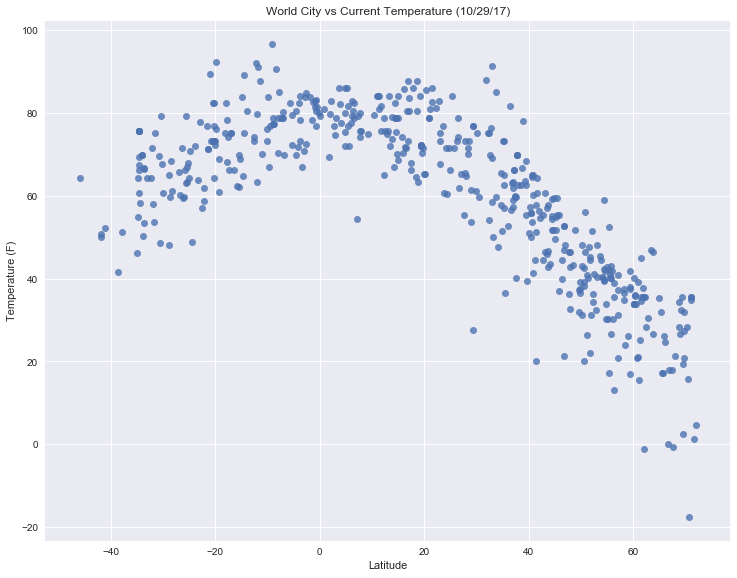

In [8]:
# 5) Generate plots using Seaborn

#create TEMPERATURE scatter plot using seaborn

ax = sns.lmplot(x="lat", y="temp", data=final_data, fit_reg=False, legend_out=False,size=8,aspect=1.3)
   
plt.title("World City vs Current Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

plt.show()

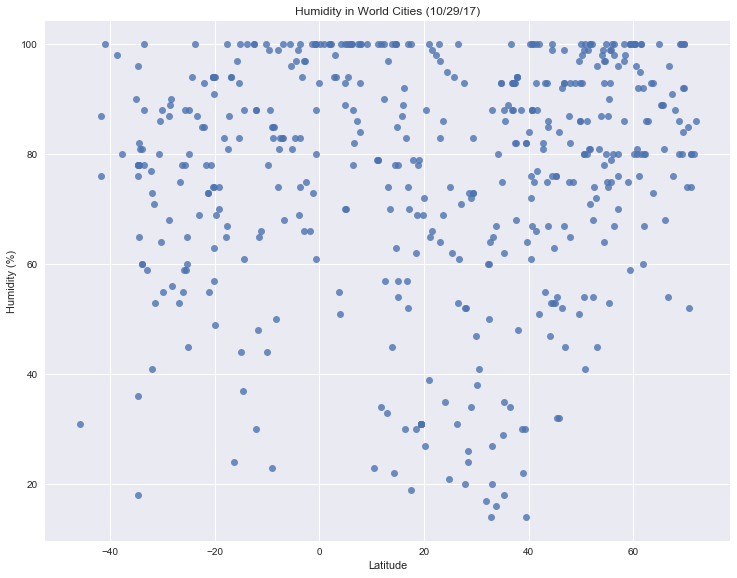

In [9]:
#create HUMIDITY scatter plot using seaborn
ax = sns.lmplot(x="lat", y="humidity", data=final_data, fit_reg=False, legend_out=False,size=8,aspect=1.3)
        
plt.title("Humidity in World Cities (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("HumidityInWorldCities.png")

plt.show()

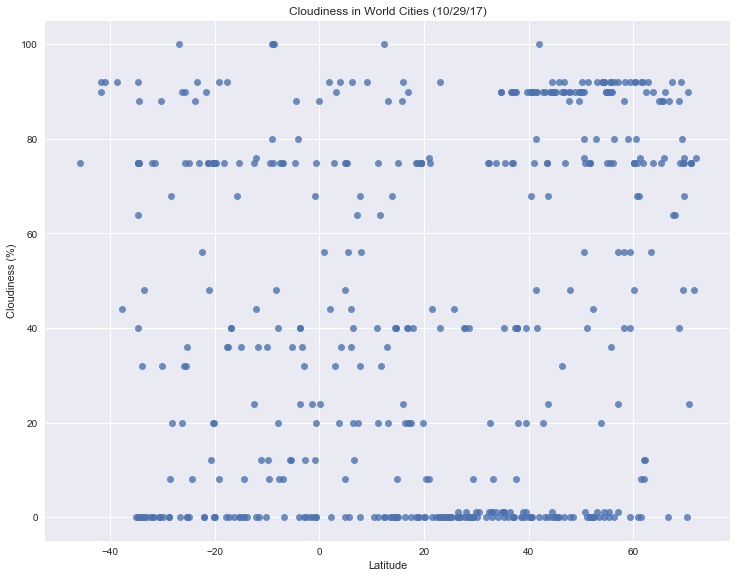

In [10]:
#create CLOUDINESS scatter plot using seaborn
ax = sns.lmplot(x="lat", y="cloudiness", data=final_data, fit_reg=False,
        legend_out=False,size=8,aspect=1.3)
        
plt.title("Cloudiness in World Cities (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("CloudinessInWorldCities.png")

plt.show()


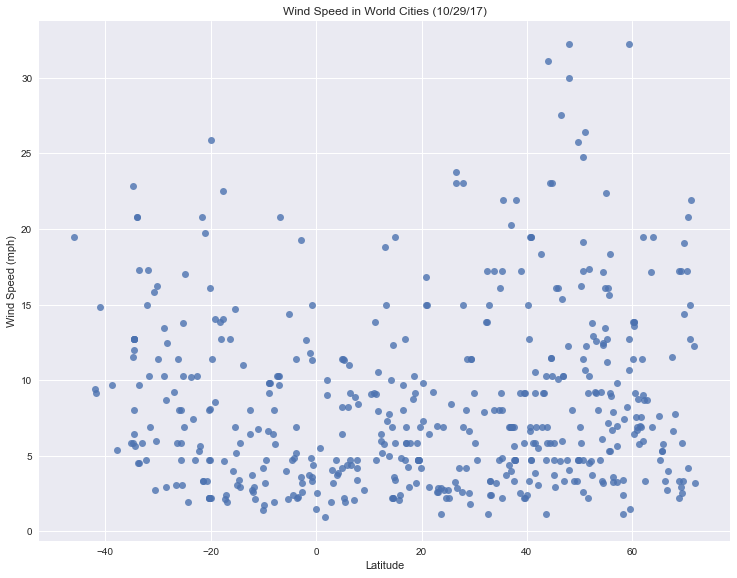

In [11]:
#create WIND SPEED scatter plot using seaborn
ax = sns.lmplot(x="lat", y="windspeed", data=final_data, fit_reg=False,size=8,aspect=1.3,
        legend_out=False)
        
plt.title("Wind Speed in World Cities (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

plt.show()

In [12]:
final_data['city'].unique()

array(['kashechewan', 'bakchar', 'hambantota', 'banda aceh', 'san jose',
       'varnek', 'muḩāfaz̧at al ‘āşimah', 'barreiras', 'britanski trg',
       'yellowknife', 'mogbwemo', 'melilla', 'cape town', 'cayenne',
       'ucluelet', 'matagami', 'sao jose da coroa grande', 'meadowlands',
       'san nicolas', 'lagoa', 'kolonaki', 'pustoshka', 'puerto ayora',
       'laguna', 'half moon bay', 'gigmoto', 'quebec', 'charters towers',
       'amparihy', 'nizhnevartovsk', 'ilhabela', 'lenape heights',
       'rio grande', 'busselton', 'pushkari', 'baturaja', 'oranjemund',
       'ribeira grande', 'kankan', 'batagay', 'south sudan',
       'havre-saint-pierre', 'siocon', 'makrygialos',
       'desert hills trailer park', 'tromsø', 'espinosa', 'tsiombe',
       'propinsi bengkulu', 'danielskuil', 'holetown', 'preston city',
       'kargasok', 'havoysund', 'otway', 'maloy', 'nogliki', 'westport',
       'clyde river', 'yar-sale', 'alvaro obregon', 'cap malheureux',
       'rímac', 'fortuna', 's

In [13]:
final_data['city'].count()

500